In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/raw/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Basic EDA - structure, type, missing values

In [13]:
print(df.info())
print("\nBasic statistics:")
print(df.describe().T)

print("\nMissing values per column:")
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Basic statistics:
                       count       mean        std      min      25%  \
fixed acidity         1599.0  

Target & feature distribution

/var/folders/5f/z2qpt2hn4tj58715kwyjyrt80000gn/T/ipykernel_39261/2795067382.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='YlOrBr', order=sorted(df['quality'].unique()))


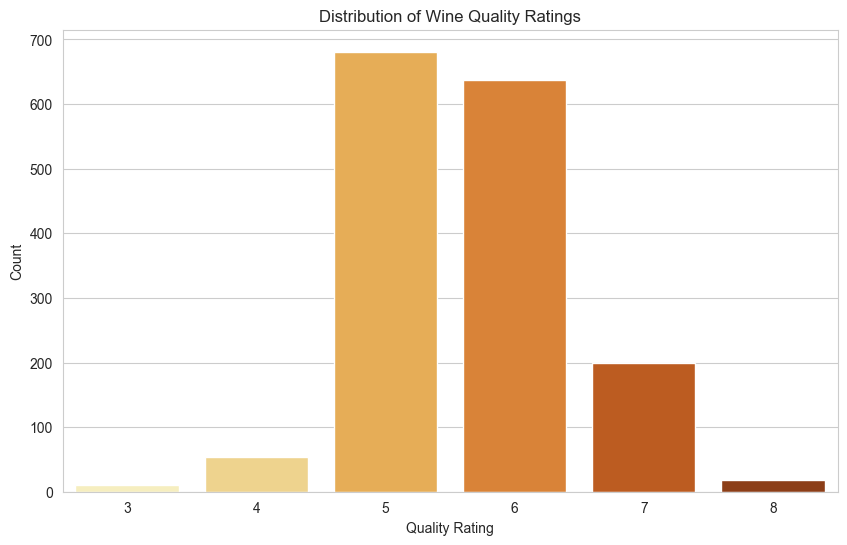

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

sns.countplot(x='quality', data=df, palette='YlOrBr', order=sorted(df['quality'].unique()))
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality Rating')
plt.ylabel('Count')
plt.savefig('../visuals/quality_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

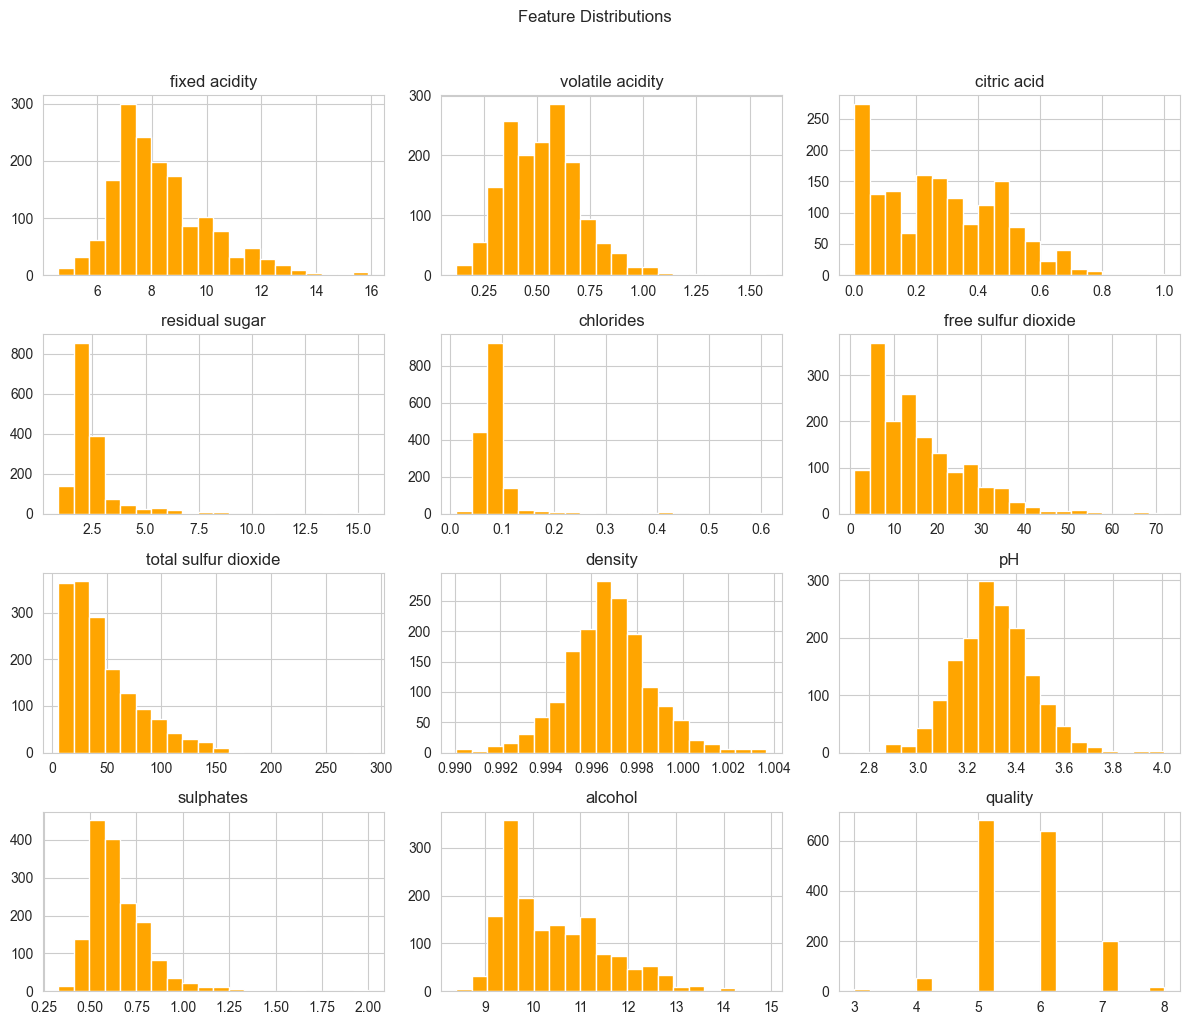

In [15]:
df.hist(figsize=(12,10), bins=20, color='orange')
plt.suptitle("Feature Distributions", y=1.02)
plt.tight_layout()
plt.savefig('../visuals/feature_histograms.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

Correlation matrix & heatmap

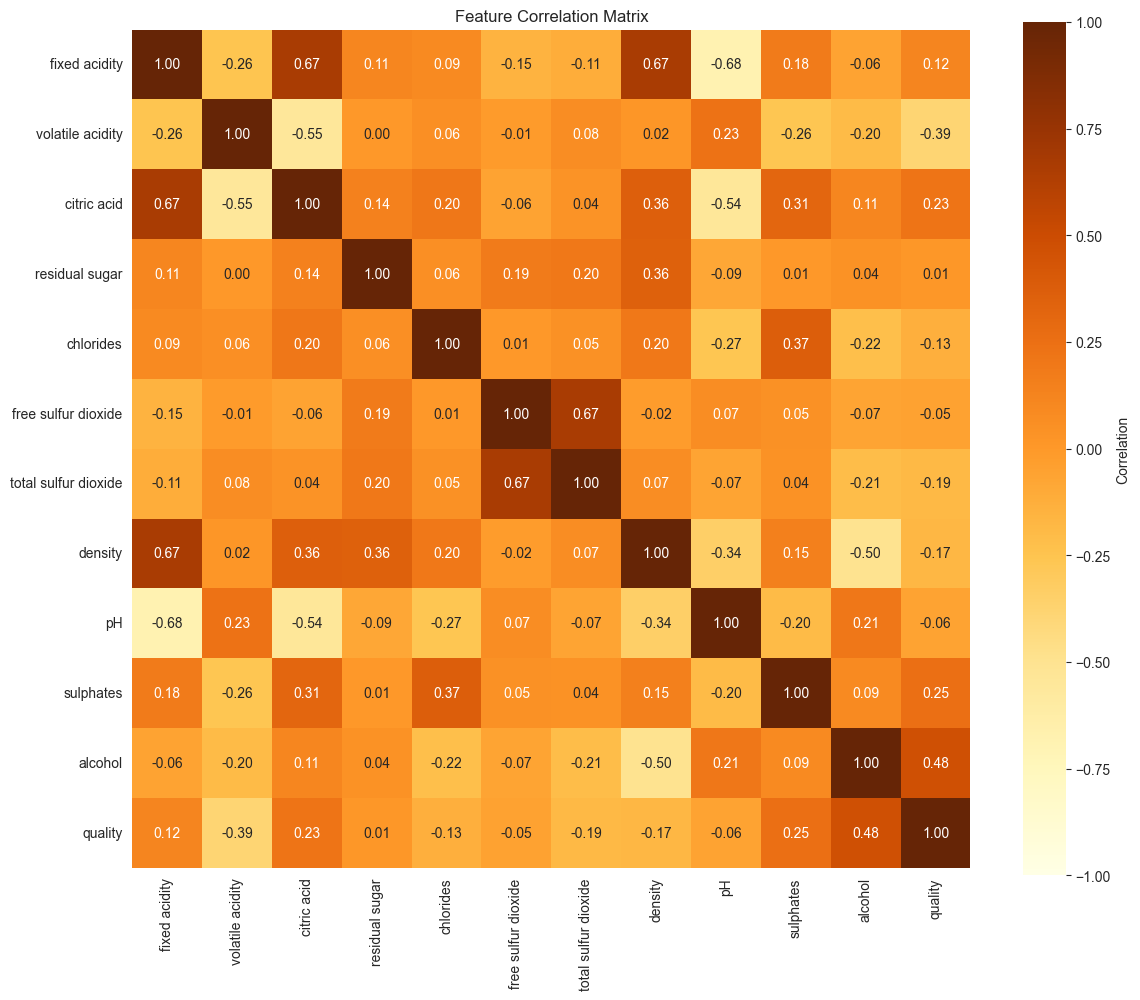


Correlation with 'quality':
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


In [16]:
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='YlOrBr', vmax=1.0, vmin=-1.0, square=True, cbar_kws={"label": "Correlation"})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('../visuals/feature_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()
print("\nCorrelation with 'quality':")
print(corr["quality"].sort_values(ascending=False))

Removing outliers improved a lot to the models capability to reason

In [17]:
Q1 = df["quality"].quantile(0.05)
Q3 = df["quality"].quantile(0.95)
df_clean = df[(df["quality"] >= Q1) & (df["quality"] <= Q3)]

In [18]:
df_clean.to_csv('../data/processed/winequality-red-cleaned.csv', index=False)